In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/2. 딥러닝

/content/drive/MyDrive/강의 자료들/2025/250701 인사교 6기 자연어처리 B반/2. 딥러닝


### 목표
- 다중분류 모델링 진행
- 모델링 중 유용한 함수 -> 콜백함수 활용해보기

In [1]:
# 도구 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # 손글씨 데이터셋

In [2]:
# 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# X_train 데이터 : 60000장의 데이터, 1장의 데이터 당 28*28 크기

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

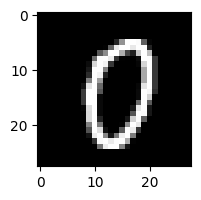

In [4]:
# 문제데이터 그려보기
plt.figure(figsize = (2, 2))
plt.imshow(X_train[1000], cmap = "gray")
plt.show()

In [5]:
# 정답데이터 확인
y_train[1000]

np.uint8(0)

In [6]:
# 픽셀 값 확인
print(X_train[0][0][0])   # 좌상단 끝에 있는 픽셀값
print(X_train[0][15][15]) # 가운데 있는 픽셀값

# 0에 가까울수록 검정색
# 255에 가까울수록 흰색

0
186


### MLP 모델링

In [7]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

# Flatten : 다차원의 구조를 1D(Dense의 입력)으로 변환

In [8]:
# 1. 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape = (28, 28)))

# 중간층
model.add(Flatten()) # 2차원의 데이터를 1차원으로 변환
model.add(Dense(32, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))

# 출력층
model.add(Dense(10, activation = "softmax"))

In [9]:
# 2. 학습방법 설정
model.compile(
    loss = "sparse_categorical_crossentropy",  # y 데이터가 1D인 경우
                                               # y 데이터가 2D(원핫인코딩)인 경우 - categorical_crossentropy
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# 3. 학습
h = model.fit(X_train, y_train, validation_split = 0.2, epochs = 20)

# GPU 설정 권장

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6930 - loss: 1.0659 - val_accuracy: 0.9247 - val_loss: 0.2669
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9290 - loss: 0.2480 - val_accuracy: 0.9417 - val_loss: 0.2061
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9441 - loss: 0.1969 - val_accuracy: 0.9505 - val_loss: 0.1857
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9546 - loss: 0.1621 - val_accuracy: 0.9498 - val_loss: 0.1908
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9590 - loss: 0.1487 - val_accuracy: 0.9532 - val_loss: 0.1817
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9657 - loss: 0.1226 - val_accuracy: 0.9583 - val_loss: 0.1487
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9649 - loss: 0.1262 - val_accuracy: 0.9627 - val_loss: 0.1375
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.1070 -

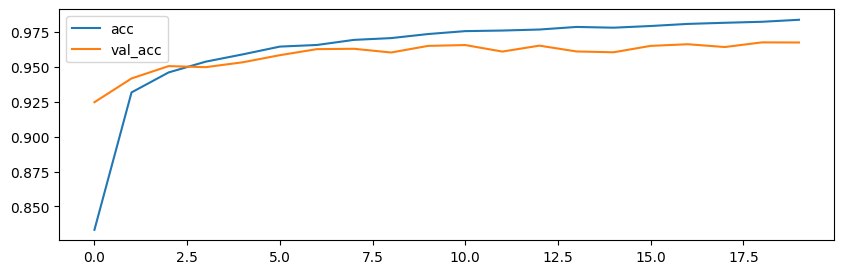

In [ ]:
# 시각화
plt.figure(figsize = (10, 3))

plt.plot(h.history["accuracy"], label = "acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")

plt.legend()

plt.show()

### Callback 함수
- 특정 이벤트가 발생했을 때 호출되는 함수
- 쉽게, 딥러닝 모델링 시 유용한 도구(함수)

#### 모델 중간 저장, 조기 학습 중단
- 모델 중간 저장 : 중간에 일반화 된 모델을 저장할 수 있는 기능
- 조기 학습 중단 : 일정 epoch 이상일 때는 val/test 성능 개선이 이루어 지지 않음 -> 모델의 성능이 개선되지 않는 경우, 학습을 중단

In [10]:
# 모델 저장
model.save("./data/hand_model.keras") # h5, hdf5 확장자도 존재함(옛날꺼)

FileNotFoundError: [Errno 2] No such file or directory: './data/hand_model.keras'

In [ ]:
# 모델 로드
from tensorflow.keras.models import load_model
loaded_model = load_model("./data/hand_model.keras")

In [ ]:
# 불러온 모델 사용(예측)
loaded_model.predict(X_test)[0].argmax() # 최댓값을 가지는 인덱스 번호 반환

# 7로 예측!

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


np.int64(7)

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [17]:
# 경로 및 파일명 지정

model_path = "./data/handmodel-{epoch:03d}-{val_accuracy:.3f}.keras"

In [18]:
# 생성(초기화)
model_checkpoint_callback = ModelCheckpoint(
    filepath = model_path,
    monitor = "val_accuracy", # 검증 정확도 기준
    save_best_only = True,    # 나아진 결과만 저장
    verbose = 1               # 저장 결과에 대해 출력
)

early_stop_callback = EarlyStopping(
    monitor = "val_accuracy", # 기준
    patience = 5              # 전보다 나아지지 않아도 학습할 기회
)

In [20]:
h = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=20,
              callbacks=[model_checkpoint_callback, early_stop_callback])

Epoch 1/20
1487/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0583
Epoch 1: val_accuracy did not improve from 0.96775
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9840 - loss: 0.0583 - val_accuracy: 0.9643 - val_loss: 0.1715
Epoch 2/20
1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0576
Epoch 2: val_accuracy improved from 0.96775 to 0.96842, saving model to ./data/handmodel-002-0.968.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9842 - loss: 0.0576 - val_accuracy: 0.9684 - val_loss: 0.1576
Epoch 3/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0527
Epoch 3: val_accuracy did not improve from 0.96842
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0527 - val_accuracy: 0.9682 - val_loss: 0.1709
Epoch 4/20
1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0511
Epoch 4: val_accuracy did not improve from 0.96842
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s